# 2. Machine Learning for Regression

In [3]:
import pandas as pd
import numpy as np
from pyexpat import features

# 2.2 Data preparation

In [12]:
import urllib.request
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'
filename = 'data/data.csv'
urllib.request.urlretrieve(url, filename)


('data/data.csv', <http.client.HTTPMessage at 0x26f84141310>)

In [4]:
df = pd.read_csv('data/data.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [10]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [11]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [12]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2.3 Exploratory data analysis

In [27]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [28]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [32]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
sns.histplot(df.msrp, bins=50)

<IPython.core.display.Javascript object>

<Axes: xlabel='msrp', ylabel='Count'>

In [14]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

<IPython.core.display.Javascript object>

<Axes: xlabel='msrp', ylabel='Count'>

In [15]:
price_logs = np.log1p(df.msrp)

In [16]:
sns.histplot(price_logs, bins=50)

<IPython.core.display.Javascript object>

<Axes: xlabel='msrp', ylabel='Count'>

In [18]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up the validation framework

In [19]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [20]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [21]:
idx = np.arange(n)

In [23]:
np.random.seed(2)
np.random.shuffle(idx)

In [24]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [25]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [37]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [38]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [39]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

# 2.5 to 2.8 Linear Regression

In [40]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [41]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [42]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [44]:
X_train = df_train[base].fillna(0).values

In [45]:
w0, w = train_linear_regression(X_train, y_train)

In [46]:
y_pred = w0 + X_train.dot(w)

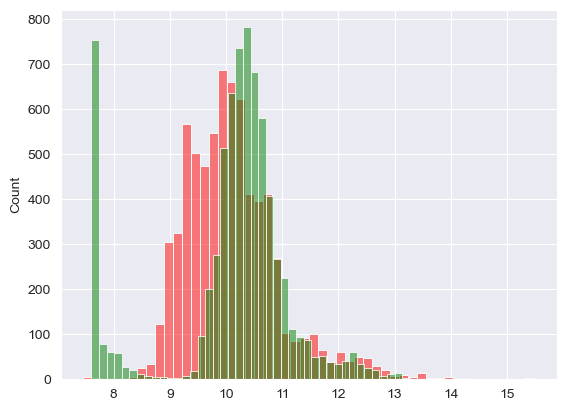

In [65]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='green', alpha=0.5, bins=50)
plt.show()

# 2.9 RMSE

In [66]:
def rmse(y, y_pred):
    error = y - y_pred
    return np.sqrt(np.mean(error ** 2))

In [67]:
rmse(y_train, y_pred)

0.7552923163732567

# 2.10 Validating the model

In [70]:
def prepare_X(df):
    X = df[base].fillna(0).values
    return X

In [71]:
X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)
rmse(y_val, y_pred_val)

0.8012888017163331

# 2.11 Feature Engineering

In [73]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    X = df[features].fillna(0).values
    return X

In [75]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

rmse(y_val, y_pred_val)

0.5202611727722106

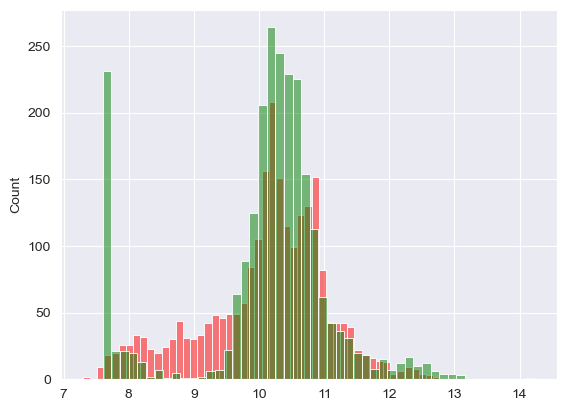

In [76]:
sns.histplot(y_pred_val, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='green', alpha=0.5, bins=50)
plt.show()

# 2.12 Categorical variables

In [79]:
categorical_vars = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style', 'number_of_doors']
categories = {}
for c in categorical_vars:
    categories[c] = list(df[c].value_counts().head().index)
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback'],
 'number_of_doors': [4.0, 2.0, 3.0]}

In [80]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base.copy()
    features.append('age')
    
    # for v in [2,3,4]:
    #     df[f"num_doors_{v}"] = (df.number_of_doors == v).astype('int')
    #     features.append(f"num_doors_{v}")
    for c,values in categories.items():
        for v in values:
            df[f"{c}_{v}"] = (df[c] == v).astype('int')
            features.append(f"{c}_{v}")
    
    X = df[features].fillna(0).values
    return X

In [81]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

rmse(y_val, y_pred_val)


11386.32878997803

# 2.13 Regularization

In [83]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [84]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

rmse(y_val, y_pred_val)

0.509225695955332

# 2.14 Tuning the model

In [85]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)
    
    X_val = prepare_X(df_val)
    y_pred_val = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred_val)
    
    print(r, w0, score)

0.0 1.877000773956103e+18 11386.32878997803
1e-05 7.2299580182083965 0.5095999189139498
0.0001 6.843391179122137 0.5095964941269234
0.001 6.834578479919699 0.5095624141794723
0.01 6.813507671383297 0.509225695955332
0.1 6.620555638522436 0.5062066125160146
1.0 5.707382394963248 0.4900547275698235
10 4.183901101811141 0.47160347928899926


In [86]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = r)

X_val = prepare_X(df_val)
y_pred_val = w0 + X_val.dot(w)

score = rmse(y_val, y_pred_val)
score

0.5095624141794723

# 2.15 Using the model

In [90]:
df_full_train = pd.concat([df_train, df_val])

In [91]:
df_full_train = df_full_train.reset_index(drop=True)

In [92]:
X_full_train = prepare_X(df_full_train)

In [96]:
y_full_train = np.concatenate([y_train, y_val])

In [97]:
r = 0.001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = r)

X_test = prepare_X(df_test)
y_pred_test = w0 + X_test.dot(w)

score = rmse(y_test, y_pred_test)
score

0.4499243075381376

In [99]:
car = df_test.iloc[20].to_dict()
car

{'make': 'bmw',
 'model': 'x1',
 'year': 2015,
 'engine_fuel_type': 'premium_unleaded_(required)',
 'engine_hp': 240.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,luxury',
 'vehicle_size': 'midsize',
 'vehicle_style': '4dr_suv',
 'highway_mpg': 32,
 'city_mpg': 22,
 'popularity': 3916}

In [100]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,bmw,x1,2015,premium_unleaded_(required),240.0,4.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,32,22,3916


In [101]:
X_small = prepare_X(df_small)
y_pred_small = w0 + X_small.dot(w)
y_pred_small = y_pred_small[0]
y_pred_small


10.728411426219141

In [102]:
np.expm1(y_pred_small)

45633.14121525329

In [103]:
np.expm1(y_test[20])

32999.99999999999